# Imports & Set Up

In [310]:
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import numpy as np

In [575]:
pd.set_option('display.max_rows', 1000)

# 50 Schools

In [92]:
data_schools = pd.read_csv('50_Schools_Data.csv')
data_schools = data_schools.rename(columns={"Rating Count": "RC",'Unnamed: 0': 'CodeKeys'})

In [93]:
data_schools

CodeKeys                                        School    Rating      RC
0          0                         University of Wyoming  3.726242    3091
1          1             University of Wisconsin - Madison  3.785536   47657
2          2                      West Virginia University  3.805346   23026
3          3                      University of Washington  3.784432   41845
4          4                       George Mason University  3.777748   74811
5          5                         University of Vermont  3.707608   17457
6          6                      Brigham Young University  4.026193   85179
7          7       Texas A&M University at College Station  3.718053   31903
8          8           University of Tennessee - Knoxville  3.758922   38817
9          9                 South Dakota State University  3.655382    4917
10        10                  University of South Carolina  3.803050   59665
11        11                    University of Rhode Island  3.698183   24351
12        12                 Pennsylvania State University  3.692498   65250
13        13                     Portland State University  3.684162   32920
14        14                        University of Oklahoma  3.751911   19796
15        15                     The Ohio State University  3.792001   65355
16        16                    University of North Dakota  3.644255    9539
17        17               North Carolina State University  3.706634   21797
18        18          University at Buffalo (SUNY Buffalo)  3.716457   34161
19        19                         University of Alabama  3.883831   46667
20        20                University of Alaska Anchorage  3.815543   16029
21        21                      Arizona State University  3.683456  113095
22        22                        University of Arkansas  3.762967   33118
23        23   University of California Los Angeles (UCLA)  3.759124    4437
24        24              University of Colorado - Boulder  3.659779   17901
25        25                     University of Connecticut  3.648709   25491
26        26                        University of Delaware  3.697481   55942
27        27                 University of Central Florida  3.755060  105495
28        28                         University of Georgia  3.856353   43832
29        29                 University of Hawaii at Manoa  3.850891   26518
30        30                        Boise State University  3.748868   23045
31        31  University Of Illinois at Urbana - Champaign  3.669187   31040
32        32                Indiana University Bloomington  3.727530   32709
33        33                            University of Iowa  3.693351   21306
34        34                          University of Kansas  3.739869   25562
35        35                        University of Kentucky  3.770909   26467
36        36                    Louisiana State University  3.687452   23579
37        37                           University of Maine  3.709472   14752
38        38                        University of Maryland  3.662491   18985
39        39                   University of Massachusetts  3.677342   41703
40        40                     Michigan State University  3.633107    9592
41        41           University of Minnesota-Twin Cities  3.698954   49263
42        42                  Mississippi State University  3.571484    5902
43        43             University of Missouri - Columbia  3.666450   17694
44        44                      Montana State University  3.696954    4612
45        45                University of Nebraska-Lincoln  3.633749   16066
46        46                University of Nevada Las Vegas  3.866901   51608
47        47    University of New Hampshire (all campuses)  3.692107   14968
48        48      Rutgers - State University of New Jersey  3.766381   71220
49        49                      University of New Mexico  3.769516   28481

In [ ]:
# we are looking at Rating

In [95]:
anova_rating = ols('Rating~CodeKeys', data=data_schools).fit()
anova_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     4.337
Date:                Tue, 31 Dec 2019   Prob (F-statistic):             0.0427
Time:                        11:02:57   Log-Likelihood:                 59.207
No. Observations:                  50   AIC:                            -114.4
Df Residuals:                      48   BIC:                            -110.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7716      0.021    179.103      0.000       3.729       3.814
CodeKeys      -0.0015      0.001     -2.082      0.043      -0.003   -5.32e-05
==============================================================================
Omnibus:                       15.475   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.662
Skew:                           1.143   Prob(JB):                     8.86e-05
Kurtosis:                       4.931   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
anova_table = sm.stats.anova_lm(anova_rating)
print(anova_table)

            df    sum_sq   mean_sq         F    PR(>F)
CodeKeys   1.0  0.024767  0.024767  4.336672  0.042653
Residual  48.0  0.274132  0.005711       NaN       NaN


# XX Departments (PSU) XX

In [440]:
import itertools as it

my_dept = data_department['Department'].unique()

all_combinations = list(it.combinations(my_dept,r=2))
all_combinations

[('Accounting', 'Actuarial Science'),
 ('Accounting', 'Aerospace Engineering'),
 ('Accounting', 'Agriculture'),
 ('Accounting', 'Animal Science'),
 ('Accounting', 'Anthropology'),
 ('Accounting', 'Arabic'),
 ('Accounting', 'Architectural Engineering'),
 ('Accounting', 'Architecture'),
 ('Accounting', 'Art'),
 ('Accounting', 'Art Education'),
 ('Accounting', 'Art History'),
 ('Accounting', 'Astronomy'),
 ('Accounting', 'Behavioral Sciences'),
 ('Accounting', 'Biochemistry'),
 ('Accounting', 'Bioethics'),
 ('Accounting', 'Broadcasting'),
 ('Accounting', 'Business'),
 ('Accounting', 'Business Law'),
 ('Accounting', 'Chemical Engineering'),
 ('Accounting', 'Chemistry'),
 ('Accounting', 'Chinese'),
 ('Accounting', 'Civil Engineering'),
 ('Accounting', 'Classics'),
 ('Accounting', 'Communication'),
 ('Accounting', 'Communication Arts'),
 ('Accounting', 'Communication Disorders'),
 ('Accounting', 'Comparative Literature'),
 ('Accounting', 'Computer Science'),
 ('Accounting', 'Counseling'),
 (

# Departments (PSU)

In [107]:
df_teachers=pd.read_csv('RateMyProfessor_Data.csv')

In [487]:
df_teachers

Unnamed: 0                         School          Professor  \
0              0  Pennsylvania State University    Aalberts Robert   
1              1  Pennsylvania State University           Aas Erik   
2              2  Pennsylvania State University        Abaci Uygar   
3              3  Pennsylvania State University      Abalo Kodzovi   
4              4  Pennsylvania State University       Abar Caitlin   
...          ...                            ...                ...   
5020        5020  Pennsylvania State University            Zhu Nan   
5021        5021  Pennsylvania State University         Zhu Sencun   
5022        5022  Pennsylvania State University       Ziegler Greg   
5023        5023  Pennsylvania State University   Zietsma Charlene   
5024        5024  Pennsylvania State University  Zikatanova Albena   

             Department  Rating  Rating Count  
0                   Law     3.5            15  
1           Mathematics     2.3             3  
2            Philosophy     4.3            11  
3             Economics     2.8             6  
4     Human Development     4.7             3  
...                 ...     ...           ...  
5020  Actuarial Science     3.5             4  
5021   Computer Science     2.3            16  
5022       Food Science     2.7             3  
5023           Business     2.0             1  
5024        Mathematics     3.0            48  

[5025 rows x 6 columns]

In [299]:
anova_teach = ols('Rating~Department', data=df_teachers).fit()
anova_teach.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.517
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.77e-20
Time:                        14:01:04   Log-Likelihood:                -7152.1
No. Observations:                5025   AIC:                         1.460e+04
Df Residuals:                    4879   BIC:                         1.555e+04
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    3.6211      0.135     26.821      0.000       3.356       3.886
Department[T.Actuarial Science]                             -0.0211      0.733     -0.029      0.977      -1.459       1.417
Department[T.Aerospace Engineering]                         -0.1574      0.256     -0.615      0.538      -0.659       0.344
Department[T.African-American Studies]                       0.2313      0.260      0.889      0.374      -0.279       0.741
Department[T.Africana Studies]                               0.1989      0.475      0.418      0.676      -0.733       1.131
Department[T.Agriculture]                                    0.2888      0.196      1.470      0.142      -0.096       0.674
Department[T.Animal Science]                                -0.0599      0.276     -0.218      0.828      -0.600       0.480
Department[T.Anthropology]                                  -0.2015      0.202     -0.997      0.319      -0.598       0.195
Department[T.Arabic]                                         0.8789      0.475      1.849      0.065      -0.053       1.811
Department[T.Architectural Engineering]                      0.3789      1.028      0.369      0.712      -1.637       2.395
Department[T.Architecture]                                  -0.0433      0.238     -0.182      0.856      -0.510       0.424
Department[T.Art]                                           -0.0125      0.201     -0.062      0.950      -0.406       0.381
Department[T.Art Education]                                 -0.1961      0.385     -0.509      0.610      -0.951       0.558
Department[T.Art History]                                   -0.0411      0.210     -0.195      0.845      -0.453       0.371
Department[T.Astronomy]                                     -0.1526      0.213     -0.715      0.475      -0.571       0.266
Department[T.Behavioral Sciences]                           -0.0684      0.213     -0.321      0.749      -0.487       0.350
Department[T.Biochemistry]                                  -0.1903      0.241     -0.789      0.430      -0.663       0.283
Department[T.Bioethics]                                      0.7789      1.028      0.758      0.449      -1.237       2.795
Department[T.Biological Sciences]                           -0.0867      0.158     -0.550      0.582      -0.396       0.222
Department[T.Biology]                                        1.1789      1.028      1.147      0.252      -0.837       3.195
Department[T.Broadcasting]                                   1.2789      1.028      1.244      0.214      -0.737       3.295
Department[T.Business]                                       0.1492      0.166     

In [300]:
anova_table = sm.stats.anova_lm(anova_teach)
print(anova_table)

                df       sum_sq   mean_sq         F        PR(>F)
Department   145.0   379.124807  2.614654  2.516573  6.770985e-20
Residual    4879.0  5069.153848  1.038974       NaN           NaN


In [ ]:
#####################

In [472]:
mc = MultiComparison(df_teachers['Rating'], df_teachers['Department'])
mc_results = mc.tukeyhsd()

                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                     
                  group1                                     group2                   meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------------------
                                Accounting                          Actuarial Science  -0.0211    0.9  -3.299  3.2569  False
                                Accounting                      Aerospace Engineering  -0.1574    0.9 -1.3011  0.9862  False
                                Accounting                   African-American Studies   0.2313    0.9 -0.9318  1.3945  False
                                Accounting                           Africana Studies   0.1989    0.9 -1.9263  2.3242  False
                                Accounting                                Agriculture   0.2888    0.9 -0.5895   1.167  False


In [603]:
mc_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [683]:
dep_stats_df=pd.DataFrame(mc_results.summary())

In [670]:
dep_stats_df.head()

0                         1         2      3        4       5  \
0      group1                    group2  meandiff  p-adj    lower   upper   
1  Accounting         Actuarial Science   -0.0211    0.9   -3.299  3.2569   
2  Accounting     Aerospace Engineering   -0.1574    0.9  -1.3011  0.9862   
3  Accounting  African-American Studies    0.2313    0.9  -0.9318  1.3945   
4  Accounting          Africana Studies    0.1989    0.9  -1.9263  2.3242   

        6  
0  reject  
1   False  
2   False  
3   False  
4   False

In [671]:
dep_stats_df = dep_stats_df.rename(columns={0: 'Group 1', 1: 'Group 2', 2: 'meandiff', 3 : 'p-adj', 4: 'Lower', 5: 'Upper', 6: 'Reject'})

In [672]:
dep_stats_df = dep_stats_df.drop([0])

dep_stats_df.head()

Group 1                   Group 2 meandiff p-adj    Lower   Upper Reject
1  Accounting         Actuarial Science  -0.0211   0.9   -3.299  3.2569  False
2  Accounting     Aerospace Engineering  -0.1574   0.9  -1.3011  0.9862  False
3  Accounting  African-American Studies   0.2313   0.9  -0.9318  1.3945  False
4  Accounting          Africana Studies   0.1989   0.9  -1.9263  2.3242  False
5  Accounting               Agriculture   0.2888   0.9  -0.5895   1.167  False

In [687]:
dep_stats_df.shape

(10586, 7)

In [649]:
dep_stats_df[dep_stats_df['Reject']=='True']

Empty DataFrame
Columns: [Group 1, Group 2, meandiff, p-adj, Lower, Upper, Reject]
Index: []

In [686]:
dep_stats_df.to_csv('results.csv')

STEM vs. Population & STEM vs Arts

In [704]:
comp_sci_df = df_teachers[df_teachers['Department'] == 'Computer Science'] 

In [706]:
econ_df = df_teachers[df_teachers['Department'] == 'Economics'] 

In [714]:
music_df = df_teachers[df_teachers['Department'] == 'Music'] 

In [731]:
theater_df = df_teachers[df_teachers['Department'] == 'Theater'] 

In [705]:
ttest_ind(comp_sci_df['Rating'], df_teachers['Rating'], equal_var = False)

Ttest_indResult(statistic=-4.834702721814798, pvalue=4.992822726068666e-06)

In [707]:
ttest_ind(econ_df['Rating'], df_teachers['Rating'], equal_var = False)

Ttest_indResult(statistic=-4.993395287705777, pvalue=1.921255160448484e-06)

In [751]:
cohen1 = cohen_d(comp_sci_df['Rating'], music_df['Rating'])

In [752]:
cohen1

-1.0461716441567874

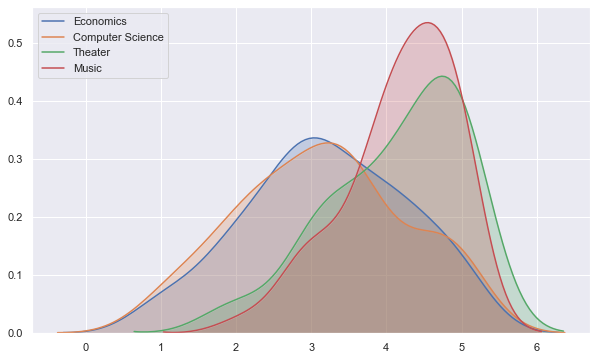

In [753]:
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(econ_df['Rating'], shade = True, label = 'Economics')
sns.kdeplot(comp_sci_df['Rating'], shade = True, label = 'Computer Science')
sns.kdeplot(theater_df['Rating'], shade = True, label = 'Theater')
sns.kdeplot(music_df['Rating'], shade = True, label = 'Music')

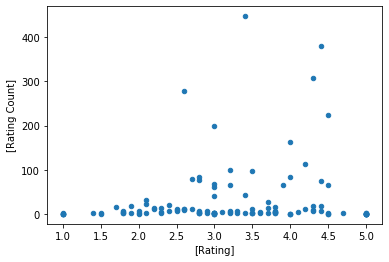

In [710]:
econ_df.plot.scatter(['Rating'],['Rating Count'])

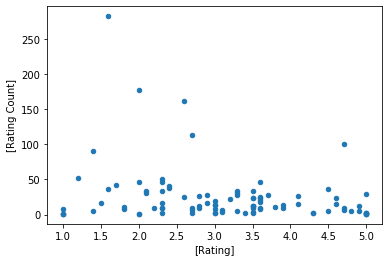

In [712]:
comp_sci_df.plot.scatter(['Rating'],['Rating Count'])

# Public vs. Private

In [269]:
public_schools = pd.read_csv('Public_Schools_Data.csv')
private_schools = pd.read_csv('Private_Schools_Data.csv')

In [270]:
private_schools=private_schools.drop([12,19,32,37,44 ])

In [271]:
len(private_schools)

45

In [272]:
all_schools = pd.concat([public_schools, private_schools])

In [273]:
all_schools=all_schools.drop(columns='Unnamed: 0')

In [274]:
all_schools.head()

School    Rating  Rating Count Public_or_Private
0              University of Wyoming  3.726242          3091            public
1  University of Wisconsin - Madison  3.785536         47657            public
2           West Virginia University  3.805346         23026            public
3           University of Washington  3.784432         41845            public
4            George Mason University  3.777748         74811            public

In [275]:
all_schools

School    Rating  Rating Count  \
0                          University of Wyoming  3.726242          3091   
1              University of Wisconsin - Madison  3.785536         47657   
2                       West Virginia University  3.805346         23026   
3                       University of Washington  3.784432         41845   
4                        George Mason University  3.777748         74811   
5                          University of Vermont  3.707608         17457   
6                       Brigham Young University  4.026193         85179   
7        Texas A&M University at College Station  3.718053         31903   
8            University of Tennessee - Knoxville  3.758922         38817   
9                  South Dakota State University  3.655382          4917   
10                  University of South Carolina  3.803050         59665   
11                    University of Rhode Island  3.698183         24351   
12                 Pennsylvania State University  3.692498         65250   
13                     Portland State University  3.684162         32920   
14                        University of Oklahoma  3.751911         19796   
15                     The Ohio State University  3.792001         65355   
16                    University of North Dakota  3.644255          9539   
17               North Carolina State University  3.706634         21797   
18          University at Buffalo (SUNY Buffalo)  3.716457         34161   
19                         University of Alabama  3.883831         46667   
20                University of Alaska Anchorage  3.815543         16029   
21                      Arizona State University  3.683456        113095   
22                        University of Arkansas  3.762967         33118   
23   University of California Los Angeles (UCLA)  3.759124          4437   
24              University of Colorado - Boulder  3.659779         17901   
25                     University of Connecticut  3.648709         25491   
26                        University of Delaware  3.697481         55942   
27                 University of Central Florida  3.755060        105495   
28                         University of Georgia  3.856353         43832   
29                 University of Hawaii at Manoa  3.850891         26518   
30                        Boise State University  3.748868         23045   
31  University Of Illinois at Urbana - Champaign  3.669187         31040   
32                Indiana University Bloomington  3.727530         32709   
33                            University of Iowa  3.693351         21306   
34                          University of Kansas  3.739869         25562   
35                        University of Kentucky  3.770909         26467   
36                    Louisiana State University  3.687452         23579   
37                           University of Maine  3.709472         14752   
38                        University of Maryland  3.662491         18985   
39                   University of Massachusetts  3.677342         41703   
40                     Michigan State University  3.633107          9592   
41           University of Minnesota-Twin Cities  3.698954         49263   
42                  Mississippi State University  3.571484          5902   
43             University of Missouri - Columbia  3.666450         17694   
44                      Montana State University  3.696954          4612   
45                University of Nebraska-Lincoln  3.633749         16066   
46                University of Nevada Las Vegas  3.866901         51608   
47    University of New Hampshire (all campuses)  3.692107         14968   
48      Rutgers - State University of New Jersey  3.766381         71220   
49                      University of New Mexico  3.769516         28481   
0                             Harvard University  3.961238          1671   
1                            Stanford University  3.941399          1963   
2             

In [276]:
all_schools = all_schools.reset_index(drop=True)

In [277]:
all_schools.tail()

School    Rating  Rating Count Public_or_Private
90           Colgate University  3.885000          6034           private
91  College of William and Mary  3.849329         20617           private
92             Davidson College  3.901049          3654           private
93            Haverford College  4.006081           653           private
94              Barnard College  3.574074            68           private

In [278]:
pvp = {'public': 1,'private': 2}
all_schools['PvP_Code'] = all_schools['Public_or_Private'].map(pvp)

In [279]:
all_schools

School    Rating  Rating Count  \
0                          University of Wyoming  3.726242          3091   
1              University of Wisconsin - Madison  3.785536         47657   
2                       West Virginia University  3.805346         23026   
3                       University of Washington  3.784432         41845   
4                        George Mason University  3.777748         74811   
5                          University of Vermont  3.707608         17457   
6                       Brigham Young University  4.026193         85179   
7        Texas A&M University at College Station  3.718053         31903   
8            University of Tennessee - Knoxville  3.758922         38817   
9                  South Dakota State University  3.655382          4917   
10                  University of South Carolina  3.803050         59665   
11                    University of Rhode Island  3.698183         24351   
12                 Pennsylvania State University  3.692498         65250   
13                     Portland State University  3.684162         32920   
14                        University of Oklahoma  3.751911         19796   
15                     The Ohio State University  3.792001         65355   
16                    University of North Dakota  3.644255          9539   
17               North Carolina State University  3.706634         21797   
18          University at Buffalo (SUNY Buffalo)  3.716457         34161   
19                         University of Alabama  3.883831         46667   
20                University of Alaska Anchorage  3.815543         16029   
21                      Arizona State University  3.683456        113095   
22                        University of Arkansas  3.762967         33118   
23   University of California Los Angeles (UCLA)  3.759124          4437   
24              University of Colorado - Boulder  3.659779         17901   
25                     University of Connecticut  3.648709         25491   
26                        University of Delaware  3.697481         55942   
27                 University of Central Florida  3.755060        105495   
28                         University of Georgia  3.856353         43832   
29                 University of Hawaii at Manoa  3.850891         26518   
30                        Boise State University  3.748868         23045   
31  University Of Illinois at Urbana - Champaign  3.669187         31040   
32                Indiana University Bloomington  3.727530         32709   
33                            University of Iowa  3.693351         21306   
34                          University of Kansas  3.739869         25562   
35                        University of Kentucky  3.770909         26467   
36                    Louisiana State University  3.687452         23579   
37                           University of Maine  3.709472         14752   
38                        University of Maryland  3.662491         18985   
39                   University of Massachusetts  3.677342         41703   
40                     Michigan State University  3.633107          9592   
41           University of Minnesota-Twin Cities  3.698954         49263   
42                  Mississippi State University  3.571484          5902   
43             University of Missouri - Columbia  3.666450         17694   
44                      Montana State University  3.696954          4612   
45                University of Nebraska-Lincoln  3.633749         16066   
46                University of Nevada Las Vegas  3.866901         51608   
47    University of New Hampshire (all campuses)  3.692107         14968   
48      Rutgers - State University of New Jersey  3.766381         71220   
49                      University of New Mexico  3.769516         28481   
50                            Harvard University  3.961238          1671   
51                           Stanford University  3.941399          1963   
52            

In [280]:
anova_schools = ols('Rating~Public_or_Private', data=all_schools).fit()
anova_schools.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     53.02
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.04e-10
Time:                        12:52:54   Log-Likelihood:                 68.814
No. Observations:                  95   AIC:                            -133.6
Df Residuals:                      93   BIC:                            -128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.9111      0.018    221.365      0.000       3.876       3.946
Public_or_Private[T.public]    -0.1773      0.024     -7.282      0.000      -0.226      -0.129
==============================================================================
Omnibus:                       23.532   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.475
Skew:                           0.904   Prob(JB):                     1.10e-11
Kurtosis:                       6.080   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
anova_table = sm.stats.anova_lm(anova_schools)
print(anova_table)

                     df    sum_sq   mean_sq          F        PR(>F)
Public_or_Private   1.0  0.744833  0.744833  53.022314  1.041811e-10
Residual           93.0  1.306422  0.014048        NaN           NaN


In [196]:
mc = MultiComparison(all_schools['Rating'], all_schools['PvP_Code'])
mc_results = mc.tukeyhsd()
# print(mc_results)

TypeError: zip argument #4 must support iteration

In [462]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

In [282]:
ttest_ind(public_schools['Rating'], private_schools['Rating'], equal_var = False)

Ttest_indResult(statistic=-7.060528737562907, pvalue=1.4246469134340907e-09)

In [283]:
public_schools['Rating'].describe()

count    50.000000
mean      3.733798
std       0.078102
min       3.571484
25%       3.684984
50%       3.717255
75%       3.770561
max       4.026193
Name: Rating, dtype: float64

In [284]:
private_schools['Rating'].describe()

count    45.000000
mean      3.911135
std       0.151322
min       3.574074
25%       3.828696
50%       3.885000
75%       3.977489
max       4.405556
Name: Rating, dtype: float64

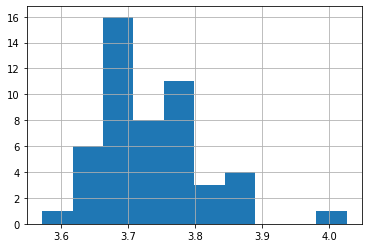

In [285]:
public_schools['Rating'].hist(bins=10)

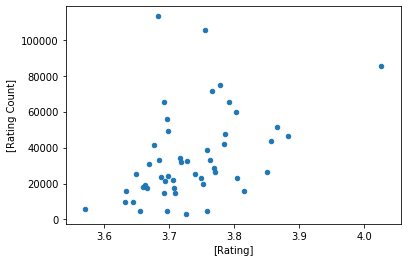

In [297]:
public_schools.plot.scatter(['Rating'],['Rating Count'])

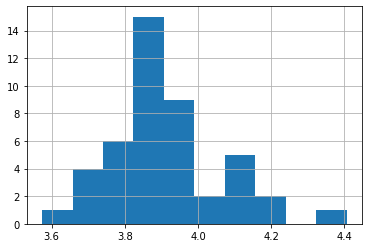

In [286]:
private_schools['Rating'].hist(bins=10)

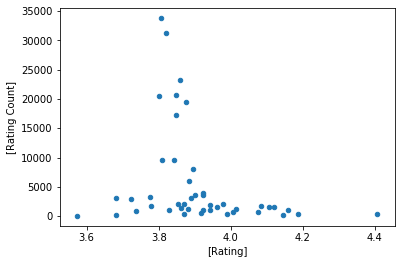

In [298]:
private_schools.plot.scatter(['Rating'],['Rating Count'])

In [229]:
def cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = ((n1-1) * var1 + (n2-1) * var2) / (n1 + n2 - 1 - 1)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [287]:
cohend = cohen_d(public_schools['Rating'], private_schools['Rating'])

In [288]:
cohend

-1.4962352453367516

In [289]:
#Power
cohend*((95/2)**0.5)

-10.31208978315873

In [740]:
import seaborn as sns
import matplotlib.pyplot as plt

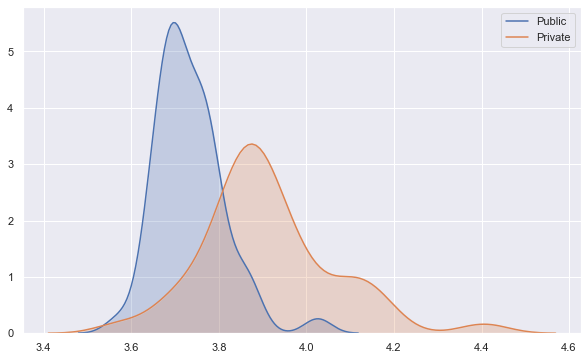

In [748]:
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(public_schools['Rating'], shade = True, label = 'Public')
sns.kdeplot(private_schools['Rating'], shade = True, label = 'Private')


In [291]:
public_schools['Rating'].corr(public_schools['Rating Count'])

0.42153474268956914

In [292]:
private_schools['Rating'].corr(private_schools['Rating Count'])

-0.2686557789948422